In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cartoes_df = pd.read_csv("creditcard.csv")
display(cartoes_df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
valores_nulos = cartoes_df.isnull().any().any()
print(valores_nulos) #vendo se tem valores nulos

False


In [28]:
cartoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
fraude = (cartoes_df['Class'] == 1).sum()
print(fraude)

492


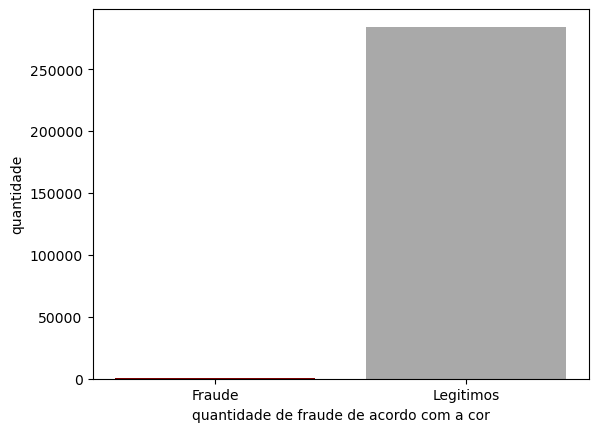

In [30]:
fraudes = (cartoes_df['Class'] == 1).sum()
legitimos = (cartoes_df['Class'] == 0).sum()

categorias_de_fraude = ['Fraude', 'Legitimos']
valores = [fraudes, legitimos]
cores = ['#800000', '#A9A9A9']

plt.bar(categorias_de_fraude, valores, color=cores)
plt.xlabel('quantidade de fraude de acordo com a cor')
plt.ylabel('quantidade')
plt.show()

In [20]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, hidden_size, output_size, activation_func, activation_derivative):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        
        self.activation_function = activation_func
        self.activation_derivative = activation_derivative
        
        self.learning_rate = 0.1
    
    def activate(self, x):
        return self.activation_function(x)
    
    def activate_derivative(self, x):
        return self.activation_derivative(x)
    
    def forward(self, inputs):
        hidden_inputs = np.dot(inputs, self.weights_input_hidden)
        hidden_outputs = self.activate(hidden_inputs)
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_output)
        final_outputs = self.activate(final_inputs)
        
        return final_outputs
    
    def backward(self, inputs, targets):
        # Forward pass
        hidden_inputs = np.dot(inputs, self.weights_input_hidden)
        hidden_outputs = self.activate(hidden_inputs)
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_output)
        final_outputs = self.activate(final_inputs)
        
        # Cálculo do erro
        output_errors = targets - final_outputs
        hidden_errors = np.dot(output_errors, self.weights_hidden_output.T)
        
        # Gradientes para atualização dos pesos
        output_gradient = output_errors * self.activate_derivative(final_outputs)
        hidden_gradient = hidden_errors * self.activate_derivative(hidden_outputs)
        
        # Atualização dos pesos usando o Gradiente Descendente
        self.weights_hidden_output += self.learning_rate * np.dot(hidden_outputs.T, output_gradient)
        self.weights_input_hidden += self.learning_rate * np.dot(inputs.T, hidden_gradient)

    def train(self, inputs, targets, epochs):
        for _ in range(epochs):
            for i in range(len(inputs)):
                self.backward(inputs[i], targets[i])

# Função de ativação sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Dados de treinamento e teste
inputs = np.array([[0.5, 0.7], [0.3, 0.2], [0.8, 0.9]])
targets = np.array([[1], [0], [1]])

# Dividindo os dados em conjuntos de treinamento e teste
split_ratio = 0.8
split_index = int(len(inputs) * split_ratio)
train_inputs = inputs[:split_index]
train_targets = targets[:split_index]
test_inputs = inputs[split_index:]
test_targets = targets[split_index:]

# Parâmetros do Perceptron
input_size = 2
hidden_size = 4
output_size = 1
epochs = 1000

# Treinamento do Perceptron
perceptron = Perceptron(input_size, hidden_size, output_size, activation_func=sigmoid, activation_derivative=sigmoid_derivative)
perceptron.train(train_inputs, train_targets, epochs)

# Teste do Perceptron
predictions = []
for test_input in test_inputs:
    prediction = perceptron.forward(test_input)
    predictions.append(prediction)

print("Previsões do perceptron:", predictions)


ValueError: shapes (4,) and (1,) not aligned: 4 (dim 0) != 1 (dim 0)

In [31]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.model_selection as model_selection
import sklearn.datasets as datasets
cartoes_df = pd.read_csv("creditcard.csv")

X = cartoes_df.copy().drop('Class', axis=1)
y = cartoes_df['Class']

over_sampler = RandomOverSampler()
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 13)


y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 99.91
